In [25]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import ifft, fft, fftfreq, fftshift, ifft2, fft2
from scipy.io import wavfile
from scipy.signal import hilbert
from audio_function import *

In [26]:
fs, data_micr_calibr =  wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/PGD_1011/TASCAM_0105S1.wav')

fs, data_micr_noise_big =  wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/PGD_1011/TASCAM_0106S1.wav')
fs, data_pgd_noise_big =  wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/PGD_1011/TASCAM_0106S2.wav')

fs, data_micr_noise_big_wo =  wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/PGD_1011/TASCAM_0107S1.wav')
fs, data_pgd_noise_big_wo =  wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/PGD_1011/TASCAM_0107S2.wav')

fs, data_micr_self_noise =  wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/PGD_1011/TASCAM_0328S1.wav')
fs, data_pgd_self_noise =  wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/PGD_1011/TASCAM_0328S2.wav')

fs, data_pgd_calibr =  wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/PGD_1011/TASCAM_0329S2.wav')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


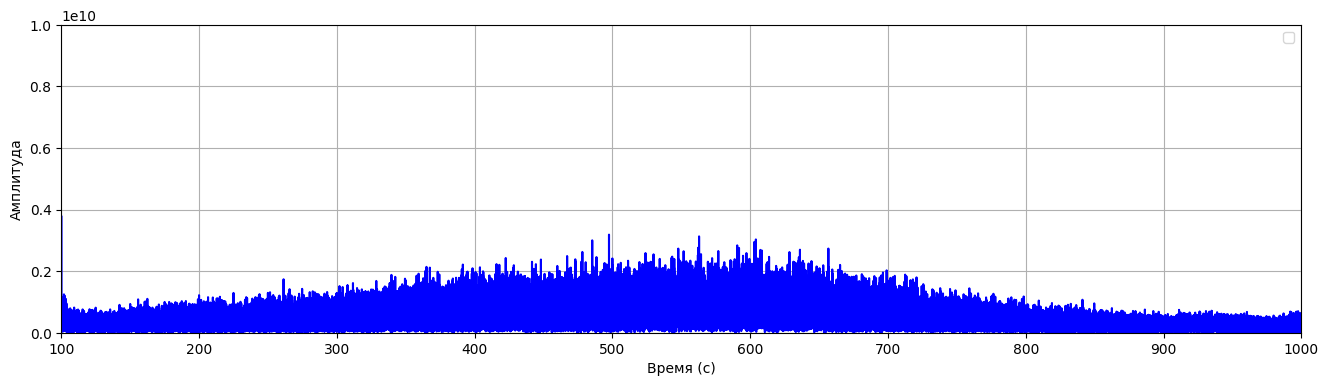

In [48]:
signal = data_pgd_noise_big
t = np.arange(len(signal))/fs
f = fftfreq(len(signal), 1 / fs)
plt.figure(figsize=(16,4))
plt.plot(f, np.abs((fft(signal))), color='blue')
plt.legend()
plt.xlabel("Время (с)")
plt.ylabel("Амплитуда")
plt.grid(True)
plt.xlim(100, 1000)
plt.ylim(0, 1e10)
plt.show()

In [28]:
import numpy as np

def generate_octave_bands(octave_fraction=12, f_low=80, f_high=10000, f_ref=1000):
    """
    Генерация октавных полос аналогично MATLAB коду
    
    Parameters:
    octave_fraction : int - дробность октавы (3, 6, 12, 24, 48)
    f_low : float - нижняя частота диапазона (Гц)
    f_high : float - верхняя частота диапазона (Гц) 
    f_ref : float - опорная частота (Гц)
    """
    # Вычисляем индексы как в MATLAB
    start_idx = np.round(np.log2(f_low/f_ref) * octave_fraction) + 1
    end_idx = np.round(np.log2(f_high/f_ref) * octave_fraction) - 1
    
    # Создаем диапазон индексов
    indices = np.arange(start_idx, end_idx + 1)  # +1 т.к. в Python конец не включается
    
    # Центральные частоты
    f0 = f_ref * 2.**(indices / octave_fraction)
    
    # Граничные частоты
    bandwidth_factor = 2**(1/(2*octave_fraction))
    f_down = f0 / bandwidth_factor
    f_up = f0 * bandwidth_factor
    
    return f0, f_down, f_up

# --- Примеры использования (аналогично MATLAB коду) ---

print("=== 1/12 октавы (как в активном коде) ===")
f0_12, f_down_12, f_up_12 = generate_octave_bands(octave_fraction=12, f_low=80, f_high=4000)
print(f"Центральные частоты: {f0_12}")
print(f"Нижние границы: {f_down_12}")
print(f"Верхние границы: {f_up_12}")


=== 1/12 октавы (как в активном коде) ===
Центральные частоты: [  83.42749089   88.38834765   93.6441923    99.21256575  105.11205191
  111.36233977  117.98428909  125.          132.43288679  140.30775604
  148.65088938  157.49013124  166.85498177  176.7766953   187.28838461
  198.4251315   210.22410381  222.72467954  235.96857817  250.
  264.86577359  280.61551208  297.30177875  314.98026247  333.70996354
  353.55339059  374.57676922  396.85026299  420.44820763  445.44935907
  471.93715634  500.          529.73154718  561.23102415  594.6035575
  629.96052495  667.41992709  707.10678119  749.15353844  793.70052598
  840.89641525  890.89871814  943.87431268 1000.         1059.46309436
 1122.46204831 1189.207115   1259.92104989 1334.83985417 1414.21356237
 1498.30707688 1587.40105197 1681.79283051 1781.79743628 1887.74862536
 2000.         2118.92618872 2244.92409662 2378.41423001 2519.84209979
 2669.67970834 2828.42712475 2996.61415375 3174.80210394 3363.58566101
 3563.59487256 3775.497

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


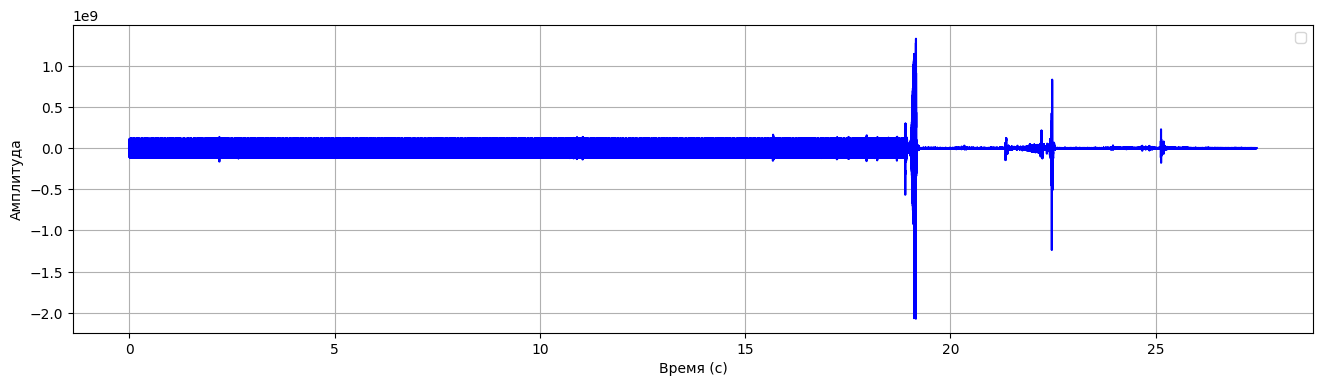

In [29]:
t_micr_calibr = np.arange(len(data_micr_calibr))/fs
f_micr_calibr = fftfreq(len(data_micr_calibr), 1 / fs)
plt.figure(figsize=(16,4))
plt.plot(t_micr_calibr, data_micr_calibr, color='blue')
plt.legend()
plt.xlabel("Время (с)")
plt.ylabel("Амплитуда")
plt.grid(True)
plt.show()

In [30]:
# Выделям временной участок, на котором калибровка
t_index = (t_micr_calibr > 5) & (t_micr_calibr < 10)
t_1000Hz = t_micr_calibr[t_index]

data_micr_calibr_5sec = data_micr_calibr[t_index]

In [31]:
data_micr_calibr_5sec = ifft(fft(data_micr_calibr_5sec))
impl_dB = 20
k_impl = 10**(impl_dB/20)

data_micr_calibr_5sec = data_micr_calibr_5sec / k_impl
data_micr_calibr = data_micr_calibr / k_impl
data_micr_noise_big = data_micr_noise_big / k_impl
data_micr_noise_big_wo = data_micr_noise_big_wo / k_impl
data_micr_self_noise = data_micr_self_noise / k_impl


k_t = RMS(data_micr_calibr_5sec)
k_to_pa = 1 / k_t
k_to_pa

1.263643011633709e-07

In [32]:
data_micr_calibr_pa = data_micr_calibr * k_to_pa
data_micr_noise_big_pa = data_micr_noise_big * k_to_pa
data_micr_noise_big_wo_pa = data_micr_noise_big_wo * k_to_pa
data_micr_self_noise = data_micr_self_noise * k_to_pa

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


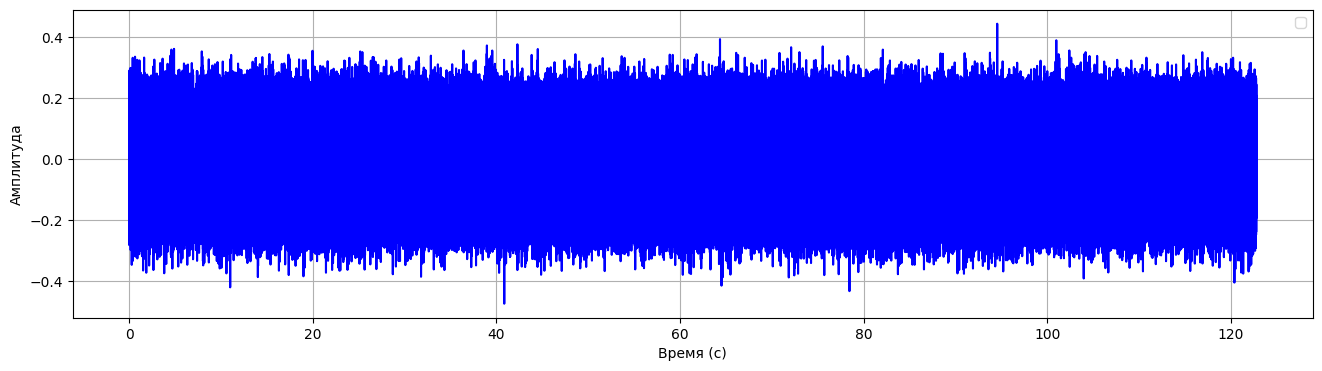

In [33]:
signal = data_micr_noise_big_pa
t = np.arange(len(signal))/fs
f = fftfreq(len(signal), 1 / fs)
plt.figure(figsize=(16,4))
plt.plot(t, ((signal)), color='blue')
plt.legend()
plt.xlabel("Время (с)")
plt.ylabel("Амплитуда")
plt.grid(True)
# plt.xlim(0, 0.1)
plt.show()

In [34]:
data_micr_noise_big_pa_rms = RMS(data_micr_noise_big_pa)
dB_level = 20 * np.log10(data_micr_noise_big_pa_rms / 2e-5)
dB_level

72.10784722140788

In [35]:
data_micr_calibr_rms = RMS(data_micr_calibr_pa)
dB_level = 20 * np.log10(data_micr_calibr_rms / 2e-5)
dB_level

93.79396907189513

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


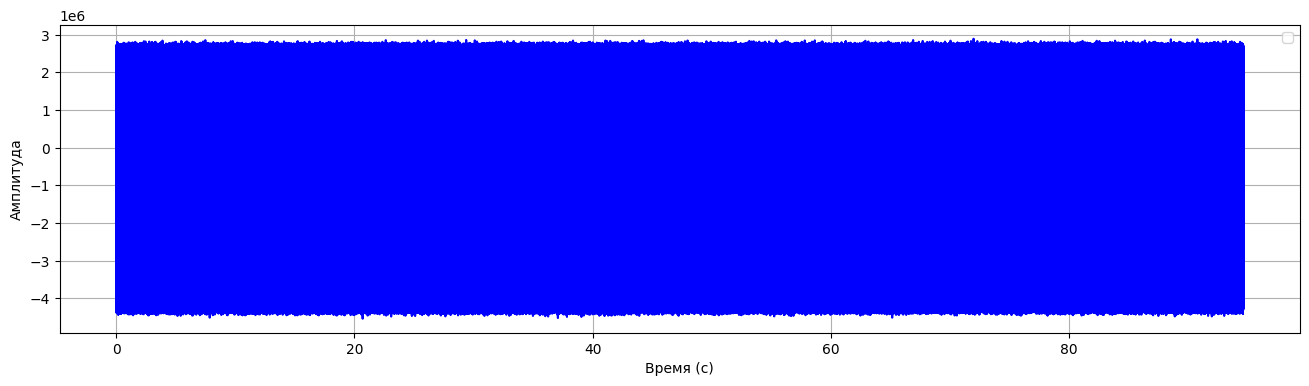

In [36]:
t_pgd_calibr = np.arange(len(data_pgd_calibr))/fs
f_pgd_calibr = fftfreq(len(data_pgd_calibr), 1 / fs)
plt.figure(figsize=(16,4))
plt.plot(t_pgd_calibr, data_pgd_calibr, color='blue')
plt.legend()
plt.xlabel("Время (с)")
plt.ylabel("Амплитуда")
plt.grid(True)
plt.show()

In [37]:
# Выделям временной участок, на котором калибровка
t_index = (t_pgd_calibr > 55) & (t_pgd_calibr < 60)
t_1000Hz = t_pgd_calibr[t_index]

data_pgd_calibr_5sec = data_pgd_calibr[t_index]

In [38]:
RMS_gen = RMS(data_pgd_calibr_5sec)
mv_gen = 366
k_to_mv = mv_gen / RMS_gen

data_pgd_noise_big_mv = data_pgd_noise_big * k_to_mv
data_pgd_noise_big_wo_mv = data_pgd_noise_big_wo * k_to_mv
data_pgd_self_noise_mv = data_pgd_self_noise * k_to_mv
k_to_mv

0.0697399978568729

In [39]:
# Задаем 2 массива RMS по октавным фильтрам для рассчета коэффициента чувствительности в мВ/Па

amplitudes_microphone = []
for f1, f2 in zip(f_down_12, f_up_12):
    data_1_filt = ifft(filt_freq(fft(data_micr_noise_big_pa), f1, f2, fs))
    amp = RMS(data_1_filt)
    amplitudes_microphone.append(amp)

amplitudes_PGD = []
for f1, f2 in zip(f_down_12, f_up_12):
    data_2_filt = ifft(filt_freq(fft(data_pgd_noise_big), f1, f2, fs))
    amp = RMS(data_2_filt)
    amplitudes_PGD.append(amp)

amplitudes_microphone = np.array(amplitudes_microphone)
amplitudes_PGD = np.array(amplitudes_PGD)
calibration_coef = amplitudes_PGD / amplitudes_microphone

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


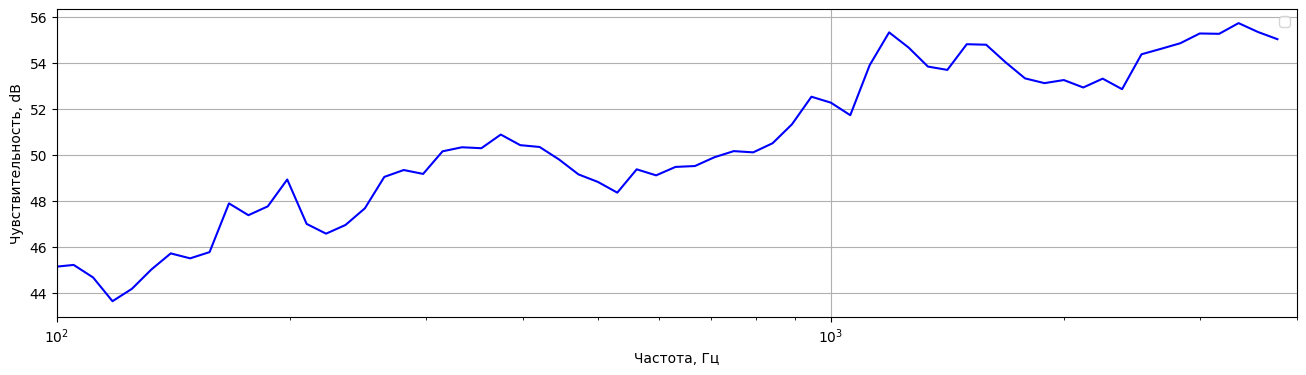

In [40]:
dB_level_calibr = 20 * np.log10(amplitudes_microphone / 2e-5)
plt.figure(figsize=(16,4))
plt.plot((f0_12), dB_level_calibr, color='blue')
plt.legend()
plt.xlabel("Частота, Гц")
plt.ylabel("Чувствительность, dB")
plt.grid(True)
plt.xscale('log')
plt.xlim(100, 4001)
plt.show()
